In [44]:
import numpy as np
import pandas as pd

In [46]:
df=pd.read_csv("C:/Users/lenovo/Downloads/skewed_dataset_with_nulls.csv")

In [48]:
df.head()

,feature1,feature2,feature3,feature4,feature5,target
0,0.543257,0.435139,-0.353418,0.706636,1.450677,0
1,1.157520,0.042548,0.084679,0.195613,0.122573,0
2,0.896500,-0.272008,-0.820761,-1.547008,-0.738434,0
3,0.348095,-0.064648,0.510454,0.380925,-0.289552,0
4,-0.074252,0.448692,-0.102820,1.006224,1.453572,1


In [50]:
df.info() # to check dayatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  4750 non-null   float64
 1   feature2  4750 non-null   float64
 2   feature3  4750 non-null   float64
 3   feature4  4750 non-null   float64
 4   feature5  4750 non-null   float64
 5   target    5000 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 234.5 KB


In [52]:
df.shape  # check rows and columns

(5000, 6)

In [54]:
df.isnull().sum()   # check the null values

feature1    250
feature2    250
feature3    250
feature4    250
feature5    250
target        0
dtype: int64

In [56]:
df.duplicated().sum()   # to check duplicates

248

In [58]:
df = df.drop_duplicates() # so drop the duplicates

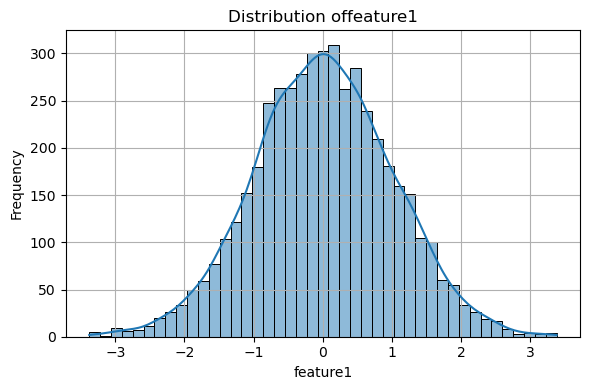

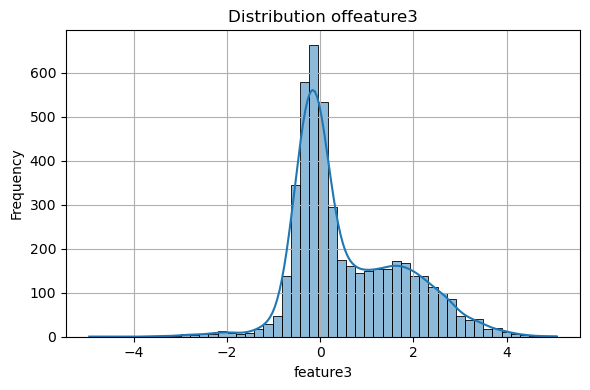

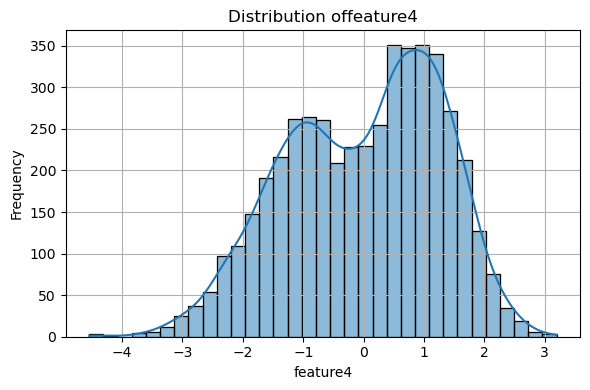

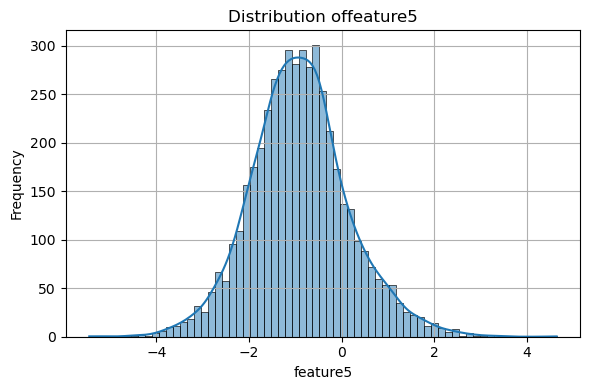

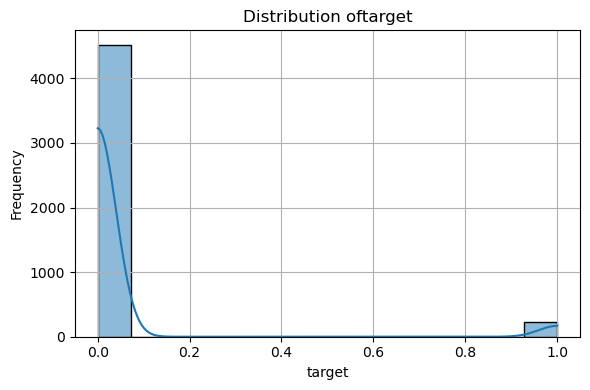

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
columns=['feature1','feature3','feature4','feature5','target']
for col in columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col],kde=True)
    plt.title(f"Distribution of{col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show

In [61]:
for col in columns:
    df[col]=df[col].fillna(df[col].median())

In [62]:
df.isnull().sum()

feature1    0
feature2    2
feature3    0
feature4    0
feature5    0
target      0
dtype: int64

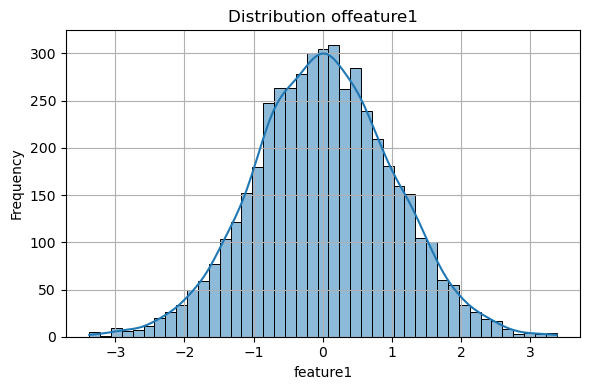

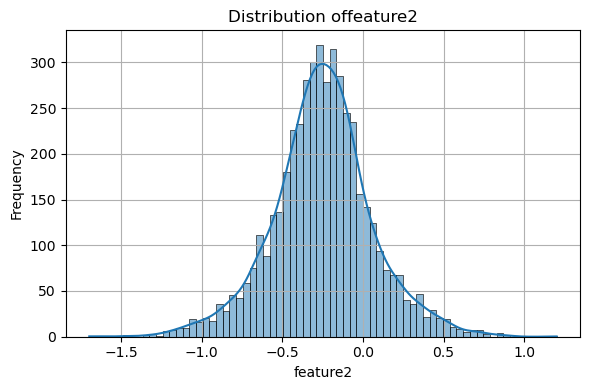

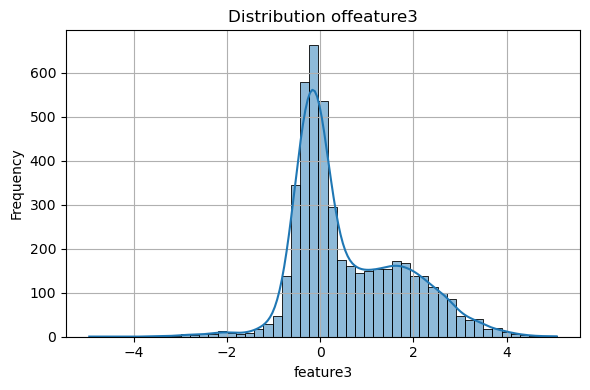

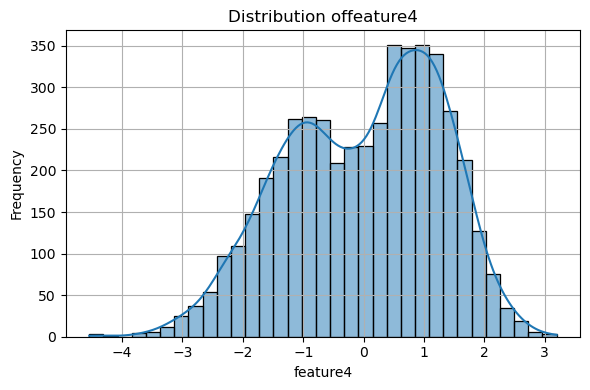

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
columns=['feature1','feature2','feature3','feature4']
for col in columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col],kde=True)
    plt.title(f"Distribution of{col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show

In [65]:
df.isnull().sum()

feature1    0
feature2    2
feature3    0
feature4    0
feature5    0
target      0
dtype: int64

In [66]:
for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    LOWER_BOUND = Q1 - 1.5 * IQR
    UPPER_BOUND = Q3 + 1.5 * IQR
    outliers = df[(df[col] < LOWER_BOUND) | (df[col] > UPPER_BOUND)]
    print(f"{col}: {outliers.shape[0]} outliers")


feature1: 45 outliers
feature2: 181 outliers
feature3: 39 outliers
feature4: 4 outliers


In [67]:
for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

In [68]:
for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {outliers.shape[0]} outliers")

feature1: 0 outliers
feature2: 0 outliers
feature3: 0 outliers
feature4: 0 outliers


In [82]:
df.to_csv('SKEWED DATASETS.csv',index=False)